# INM 431 Machine Learning Courswork
<b>Data Pre-processing <br>
    
Name: Prapas Rakchartkiattikul <br>
Student ID: 200012196<br>
Email: prapas.rakchartkiattikul@city.ac.uk

<b>Import the required libraries and read in the original data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', None)

In [2]:
cwd = os.getcwd()
script_path = cwd + '/'
data_path = script_path +'Data'
output_path = script_path +'code'

In [3]:
df = pd.read_csv(data_path + '/'+'bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<b>Data Cleaning Steps

In [6]:
# Drop the the catagorical data that is 'unknown'; also drop 'duration' column, since want to simulate practicle problem.
#However, still keep thouse default, housing, loan that still unknown
df = df.drop(df[(df['job'] == 'unknown')].index, axis =0)
df = df.drop(df[(df['marital'] == 'unknown')].index, axis =0)
df = df.drop(df[(df['education'] == 'unknown')].index, axis =0)
df = df.drop('duration',axis = 1)


In [7]:
#Convert and simplify lable of certain columns
month_int = {'jan': 1, 'feb': 2,'mar': 3,'apr': 4,'may': 5,'jun': 6,'jul': 7,'aug': 8,'sep': 9,'oct': 10,'nov': 11,'dec': 12}
df['month'].replace(month_int,inplace = True)

edu = {'basic.9y': 'basic', 'basic.4y': 'basic','basic.6y': 'basic'}
df['education'].replace(edu,inplace = True)

#day = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}
#df['day_of_week'].replace(day,inplace = True )


target = {'yes': 1, 'no': 0}
df['y'].replace(target,inplace = True)

df['age_bins'] = pd.cut(df['age'], bins=[0, 20, 30, 40,50,60,100])

In [8]:
#Change data type
df['age_bins'] = df['age_bins'].astype('str')

In [9]:
df = df.drop('age',axis = 1)

In [10]:
# https://stackoverflow.com/questions/53141240/pandas-how-to-swap-or-reorder-columns
cols = list(df.columns)
a = cols.index('y')
b = cols.index('age_bins')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]

In [11]:
df['month'] = df['month'].astype(object)
df['y'] = df['y'].astype(object)

In [12]:
# Check postive class ratio
sum(df.y)/len(df.y)

0.11125003189507796

<b>Create Correlation Matrix:
    
 Correlation Matrix is created to check the correlation between predictors in order to  remove highly correlated varaible(>=abs(0.7))

In [13]:
corr_df = df.corr()

In [14]:
# https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

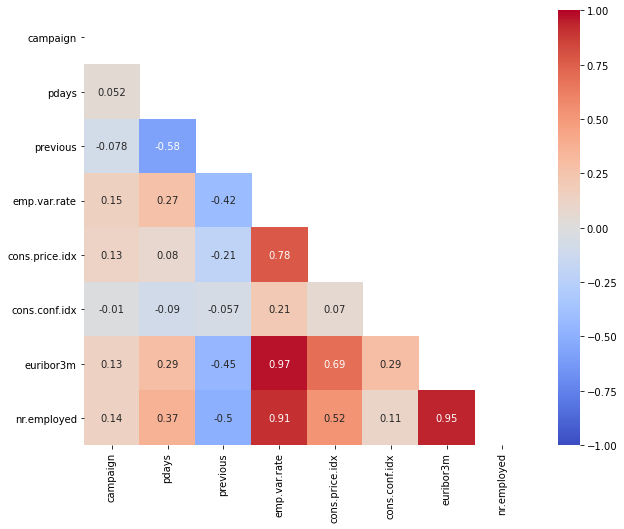

In [15]:
fig = plt.figure(figsize =(10,8))
sns.heatmap(corr_df,mask=mask,vmin=-1, vmax=1,cmap='coolwarm',annot=True)

In [18]:
#Drop highly correlated variable 
df_cleaned = df.drop('emp.var.rate', axis=1) 
df_cleaned = df_cleaned.drop('nr.employed', axis=1) 

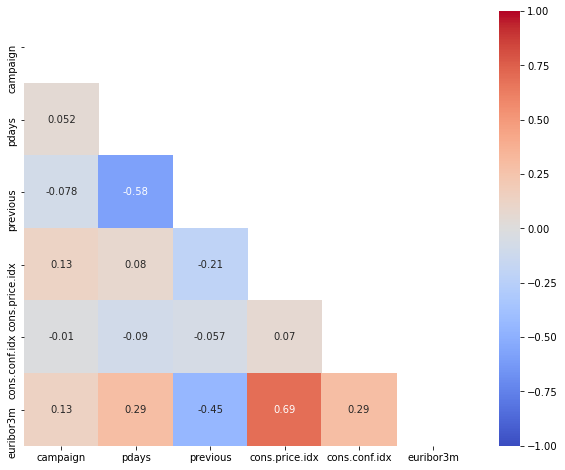

In [19]:
# Recheck Correlation
corr_2 = df_cleaned.corr()
mask = np.zeros_like(corr_2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize =(10,8))
sns.heatmap(corr_2,mask=mask,vmin=-1, vmax=1,cmap='coolwarm',annot=True)
fig.savefig('After Correlation Matrix.png')

<b> Visualize the distribution of each category predictors

In [20]:
cat_col = ['job','marital','education','default','housing','loan','contact','month',
           'day_of_week','poutcome','age_bins']

In [21]:
df_cleaned

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,age_bins,y
0,housemaid,married,basic,no,no,no,telephone,5,mon,1,999,0,nonexistent,93.994,-36.4,4.857,"(50, 60]",0
1,services,married,high.school,unknown,no,no,telephone,5,mon,1,999,0,nonexistent,93.994,-36.4,4.857,"(50, 60]",0
2,services,married,high.school,no,yes,no,telephone,5,mon,1,999,0,nonexistent,93.994,-36.4,4.857,"(30, 40]",0
3,admin.,married,basic,no,no,no,telephone,5,mon,1,999,0,nonexistent,93.994,-36.4,4.857,"(30, 40]",0
4,services,married,high.school,no,no,yes,telephone,5,mon,1,999,0,nonexistent,93.994,-36.4,4.857,"(50, 60]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,11,fri,1,999,0,nonexistent,94.767,-50.8,1.028,"(60, 100]",1
41184,blue-collar,married,professional.course,no,no,no,cellular,11,fri,1,999,0,nonexistent,94.767,-50.8,1.028,"(40, 50]",0
41185,retired,married,university.degree,no,yes,no,cellular,11,fri,2,999,0,nonexistent,94.767,-50.8,1.028,"(50, 60]",0
41186,technician,married,professional.course,no,no,no,cellular,11,fri,1,999,0,nonexistent,94.767,-50.8,1.028,"(40, 50]",1


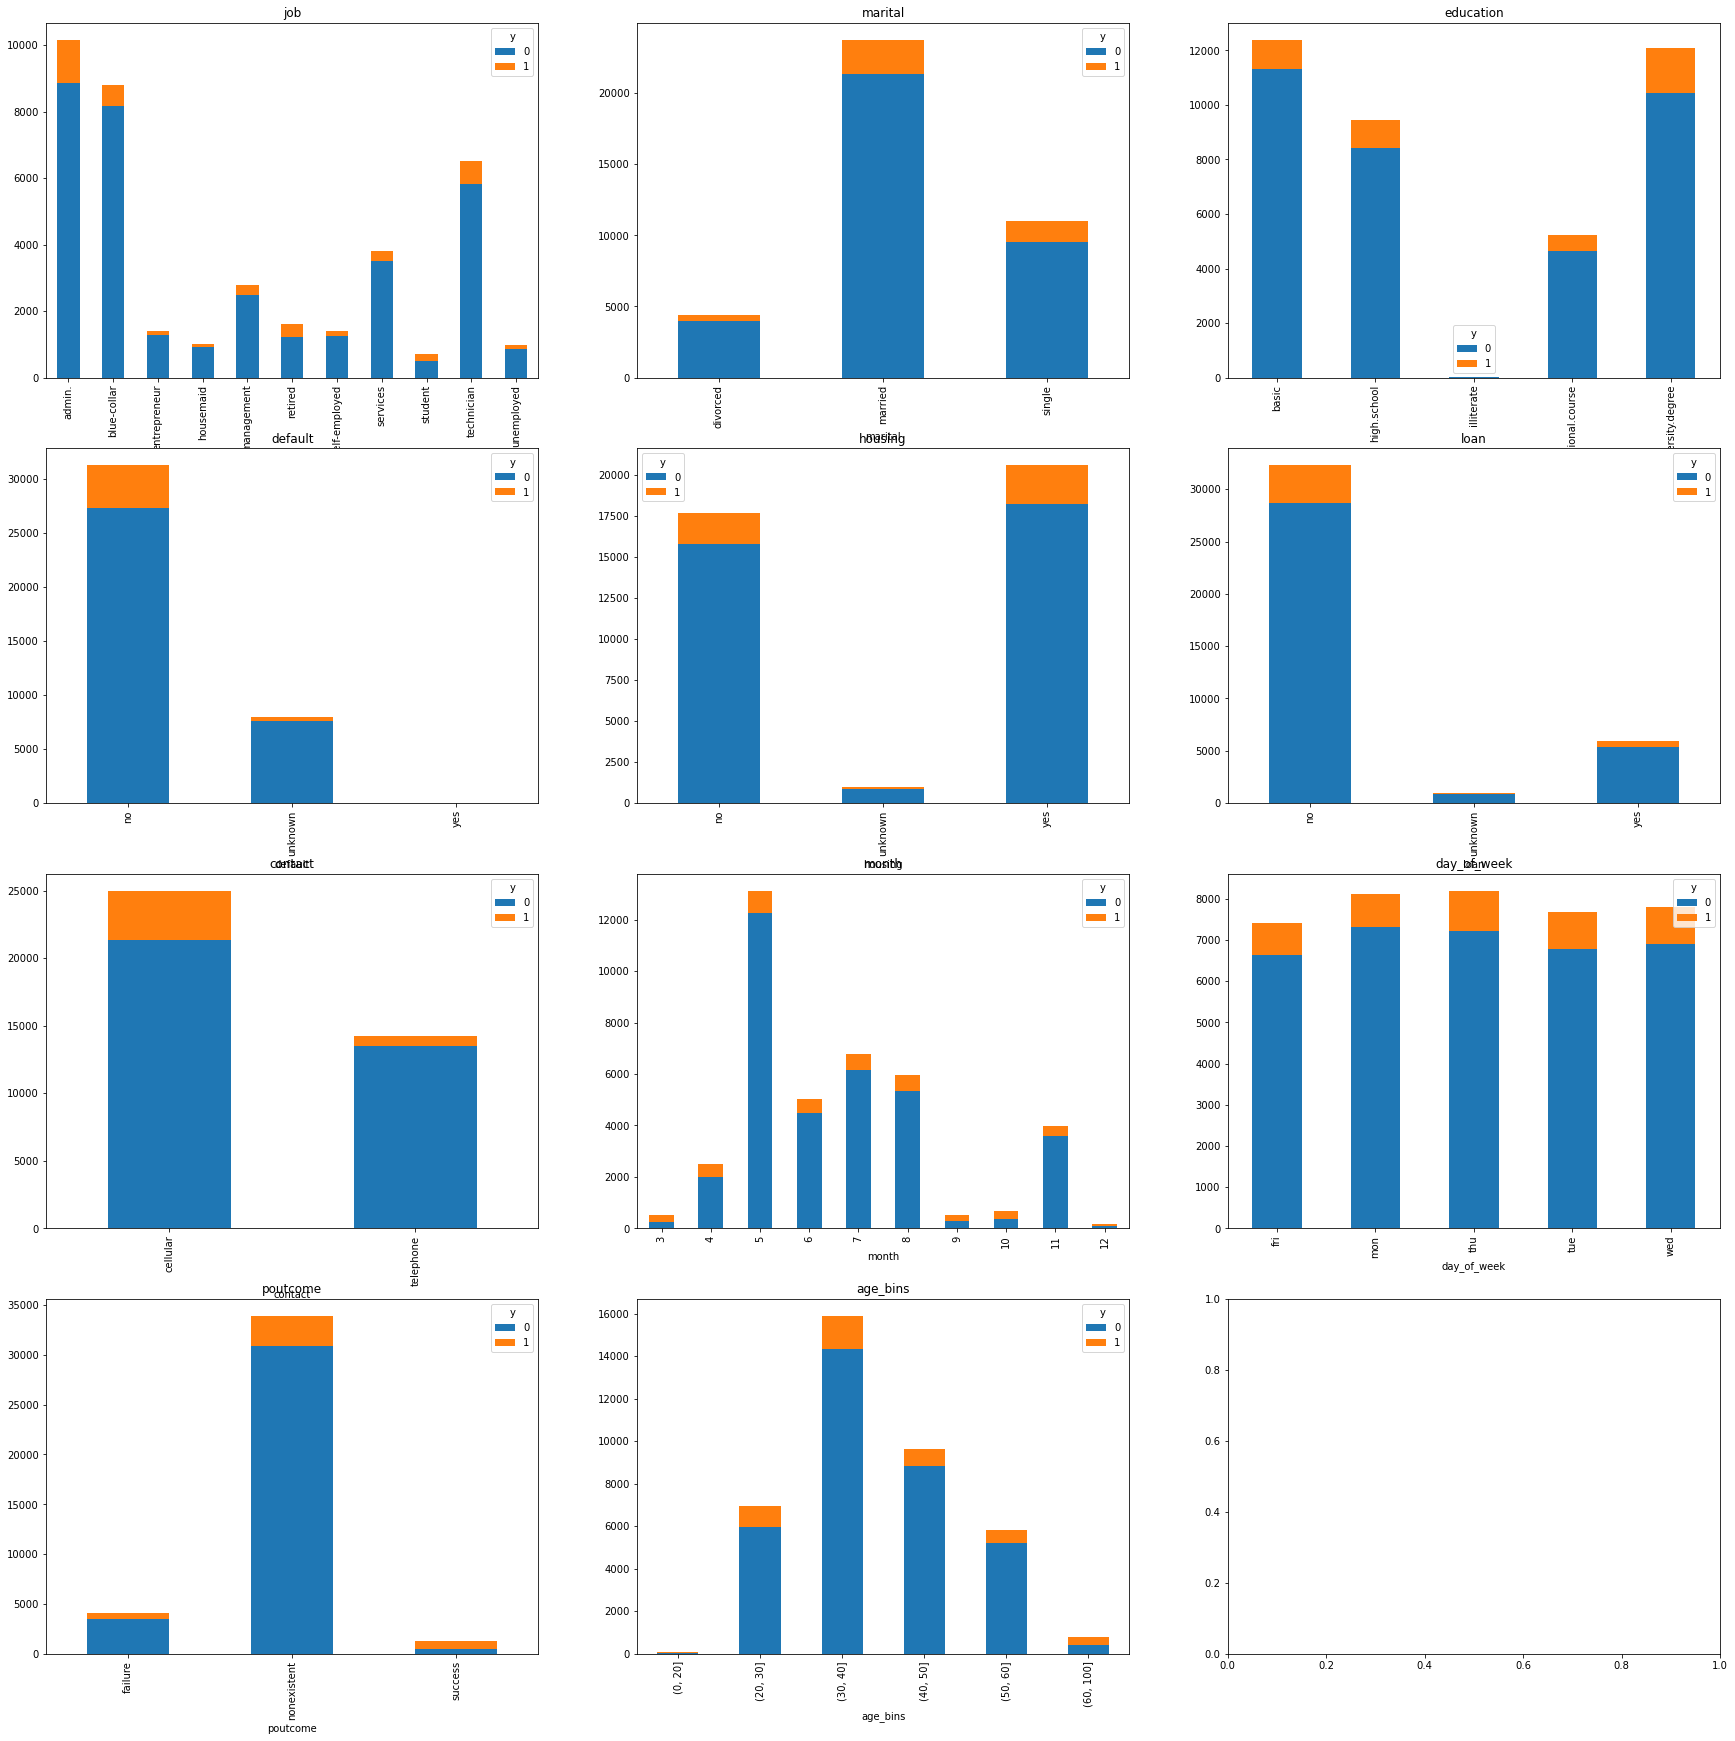

In [22]:
#Plot hist
nrow =4
ncol =3
i = 0
fig, axes = plt.subplots (nrow,ncol,figsize=(30,30))
for row in range(nrow):
    for col in range(ncol):
        if i < len(cat_col):
            #https://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots
            pd.crosstab(df_cleaned[cat_col[i]], df_cleaned['y']).plot(kind='bar', stacked=True,title = cat_col[i],ax=axes[row,col])
            i+=1

In [23]:
# Check ratio of positive class for
# Education = 'illiterate'
# Default = 'yes'
illiterate_ratio = sum(df_cleaned[df_cleaned['education'] == 'illiterate'].y)/len(df_cleaned[df_cleaned['education'] == 'illiterate'])
def_y_ratio = sum(df_cleaned[df_cleaned['default'] == 'yes'].y)/len(df_cleaned[df_cleaned['default'] == 'yes'])

print('illiterate_ratio',illiterate_ratio)
print('def_y_ratio',def_y_ratio)

illiterate_ratio 0.2222222222222222
def_y_ratio 0.0


In [24]:
# Remove default equal 'yes' to avoid bias
df_cleaned = df_cleaned.drop(df_cleaned[(df_cleaned['default'] == 'yes')].index, axis =0)

In [25]:
print('After cleaned row is',len(df_cleaned))

After cleaned row is 39188


In [ ]:
#Plot Scatter
nrow =2
ncol =3
i = 0
fig, axes = plt.subplots (nrow,ncol,figsize=(20,20))
for row in range(nrow):
    for col in range(ncol):
        if i < len(num_col):
            axes[row,col].hist(df_y[num_col[i]],bins =5,color = '#0000ff11' , label='success')
            axes[row,col].hist(df_na_y[num_col[i]],bins =5,color = '#ff000011' ,label='failed')
            #axes[row,col].scatter(df_crime['ViolentCrimesPerPop'],df_crime[target_col[i]])
            axes[row,col].title.set_text(num_col[i])
            i+=1
            

<b>Extract cleanned Data

In [26]:
# Ratio of cleaned data
sum(df_cleaned.y)/len(df_cleaned)

0.1112585485352659

In [53]:
df_cleaned['month'] = df_cleaned['month'].astype(int)
df_cleaned['y'] = df_cleaned['y'].astype(int)

In [54]:
# Extract the the whole Data
df_cleaned.to_excel(output_path + '/'+ "bank_tele_cleaned.xlsx")

<b> Split data into train and test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
df_cleaned_predictors =  df_cleaned.drop('y', axis=1) 
df_cleaned_target =  df_cleaned['y']

In [57]:
#Split data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df_cleaned_predictors, df_cleaned_target,
                                                    stratify=df_cleaned_target, 
                                                    test_size=0.3,random_state = 1)

In [58]:
# Look at train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27431, 17), (11757, 17), (27431,), (11757,))

In [59]:
#Split validation from test set with the same ratio 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    stratify=y_train, 
                                                    test_size=0.3,random_state = 4)

In [60]:
# Create original train dataset
train = X_train
y_train_df = pd.DataFrame({'y':y_train})
train = pd.concat([train,y_train_df], axis= 1)

In [61]:
# Look at train and test
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((19201, 17), (8230, 17), (19201,), (8230,))

In [62]:
# Create validation train dataset
validation = X_val
y_val_df = pd.DataFrame({'y':y_val})
validation = pd.concat([validation,y_val_df], axis= 1)

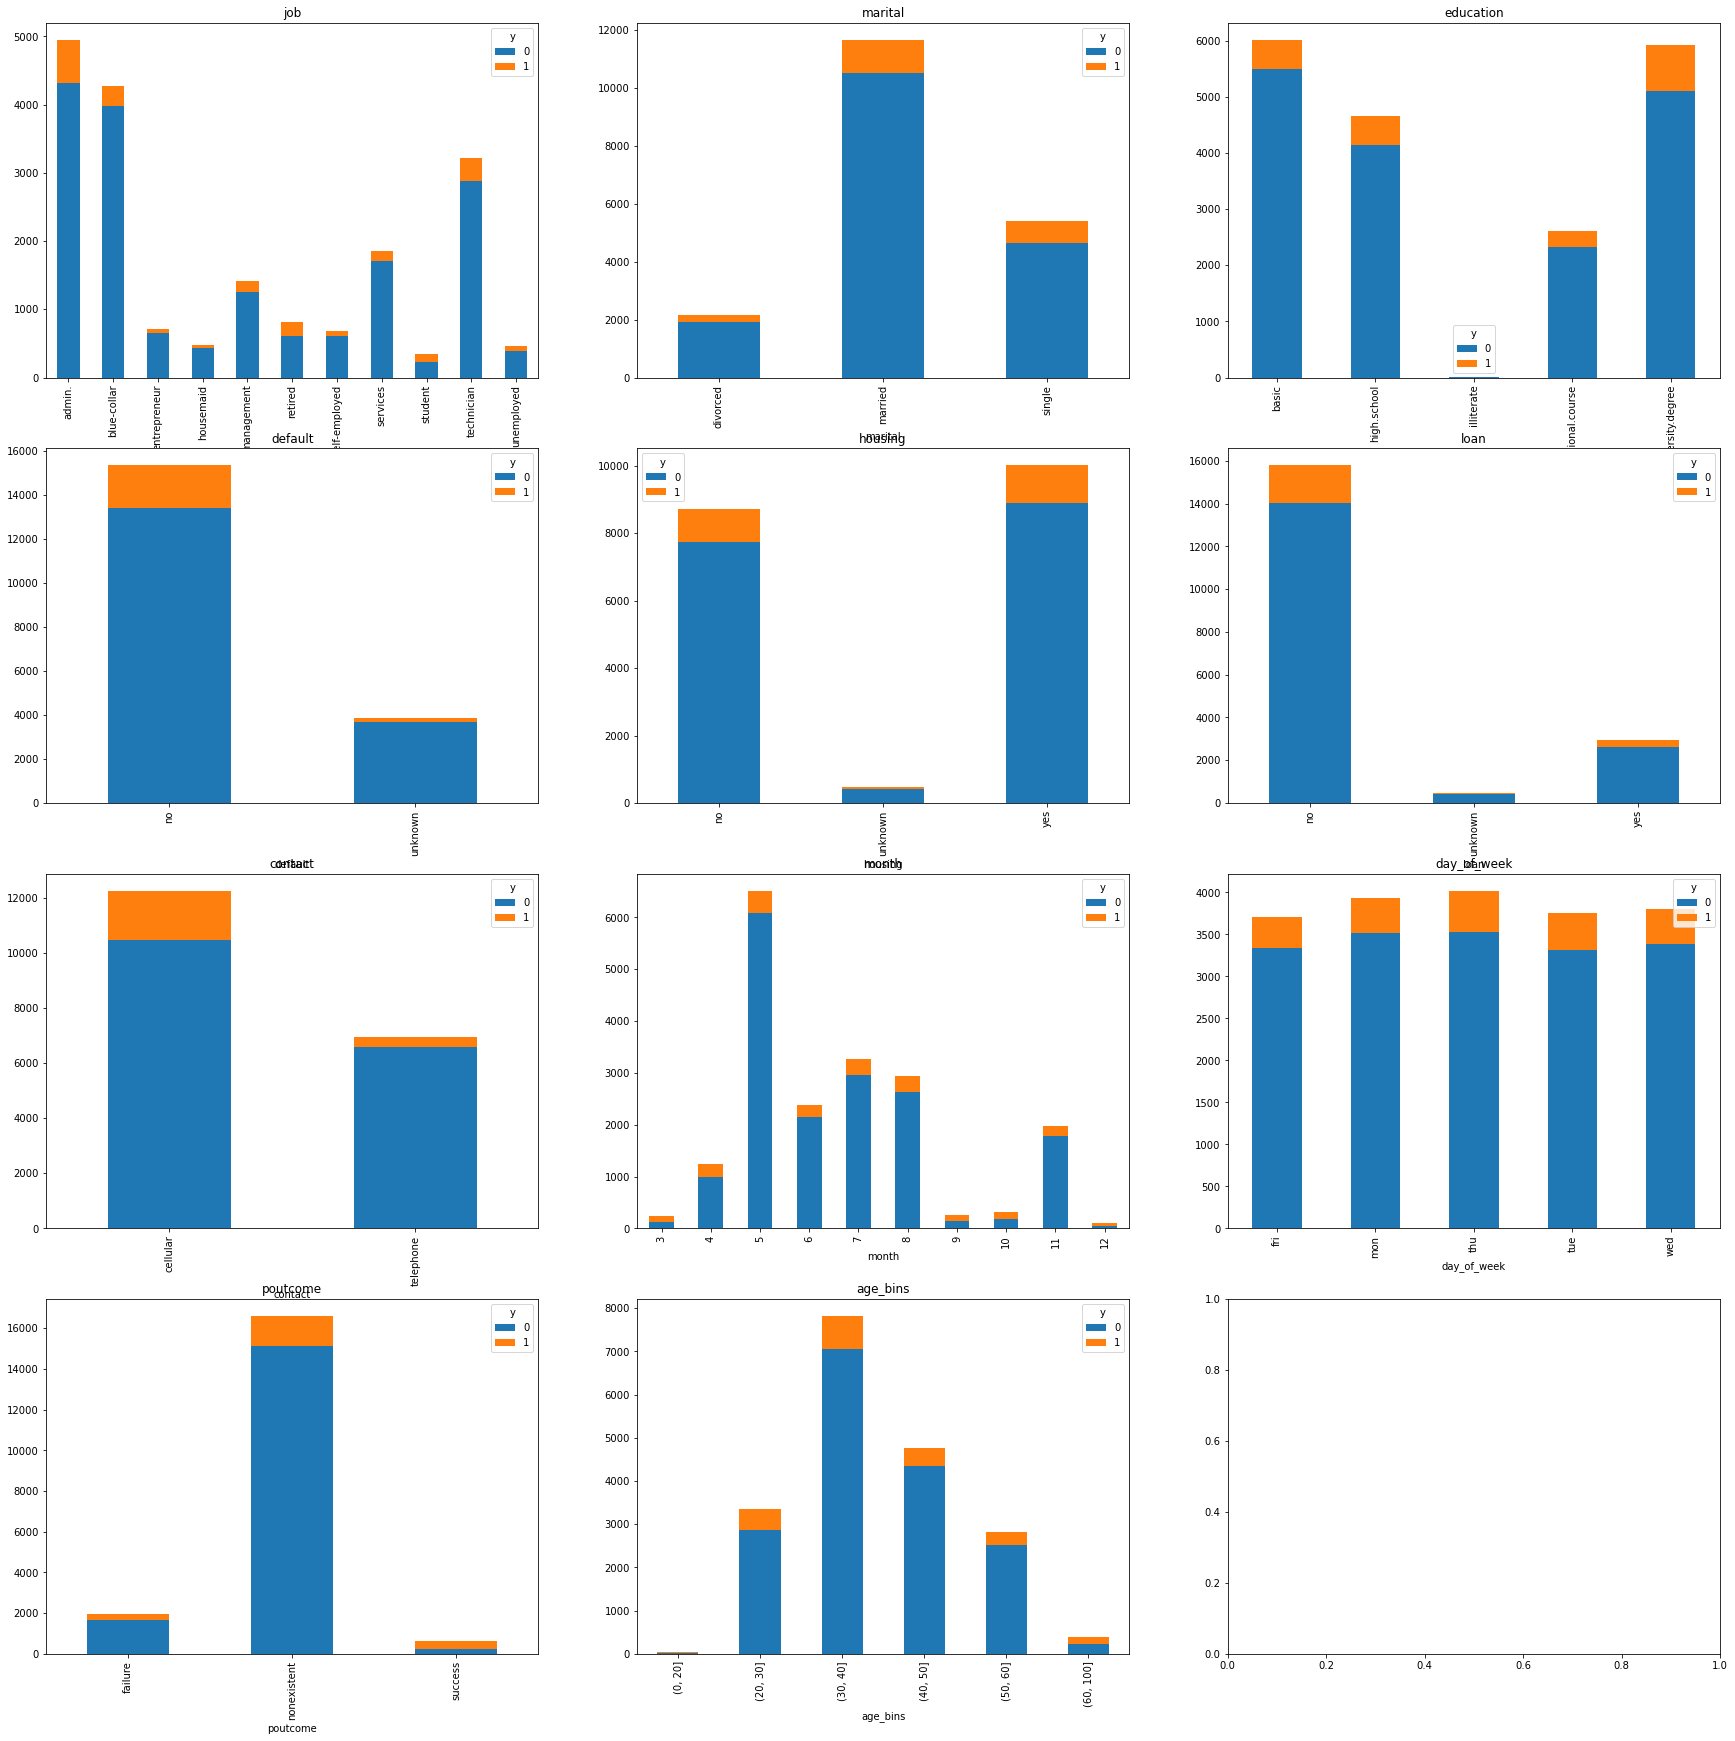

In [63]:
#Visualize Category graph for train dataset
#Plot Scatter
nrow =4
ncol =3
i = 0
fig, axes = plt.subplots (nrow,ncol,figsize=(30,30))
for row in range(nrow):
    for col in range(ncol):
        if i < len(cat_col):
            #https://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots
            pd.crosstab(train[cat_col[i]], train['y']).plot(kind='bar', stacked=True,title = cat_col[i],ax=axes[row,col])
            i+=1

In [64]:
# Check ratio of train positive class for
# Education = 'illiterate'
illiterate_ratio = sum(train[train['education'] == 'illiterate'].y)/len(train[train['education'] == 'illiterate'])
print('illiterate_ratio of train dataset',illiterate_ratio)

illiterate_ratio of train dataset 0.1


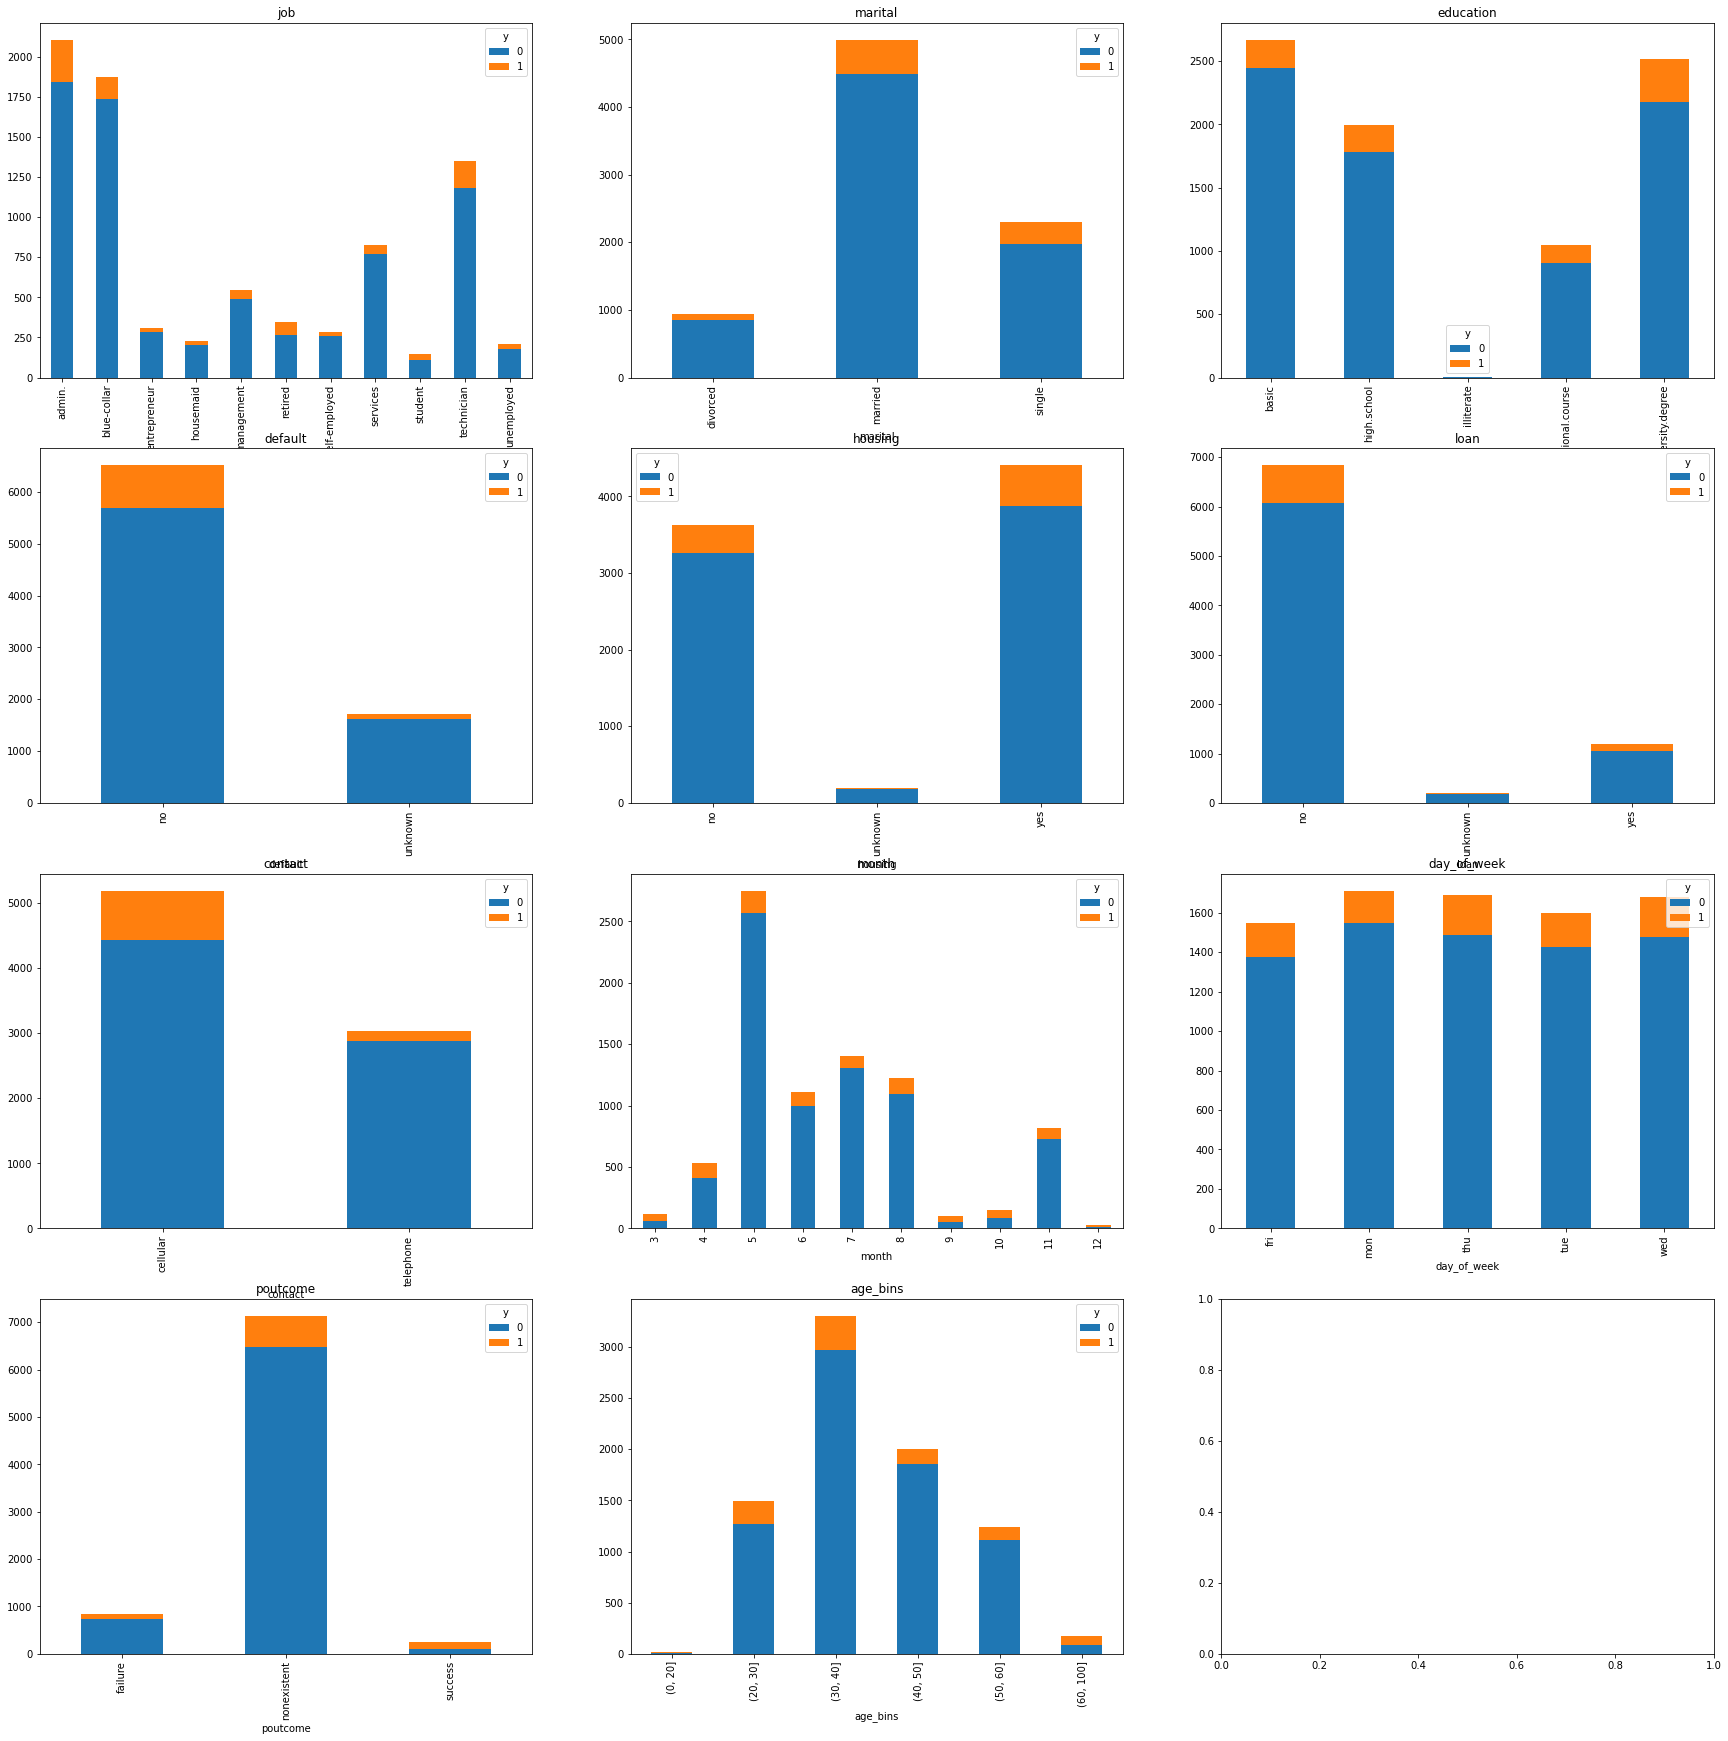

In [65]:
#Visualize Category graph for validation dataset
#Plot Scatter
nrow =4
ncol =3
i = 0
fig, axes = plt.subplots (nrow,ncol,figsize=(30,30))
for row in range(nrow):
    for col in range(ncol):
        if i < len(cat_col):
            #https://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots
            pd.crosstab(validation[cat_col[i]], validation['y']).plot(kind='bar', stacked=True,title = cat_col[i],ax=axes[row,col])
            i+=1

In [66]:
# Check ratio of validation positive class for
# Education = 'illiterate'
illiterate_ratio = sum(validation[validation['education'] == 'illiterate'].y)/len(validation[validation['education'] == 'illiterate'])
print('illiterate_ratio of validation dataset',illiterate_ratio)

illiterate_ratio of validation dataset 0.25


In [67]:
# Create test dataset
test = X_test
y_test_df = pd.DataFrame({'y':y_test})
test = pd.concat([test,y_test_df], axis= 1)

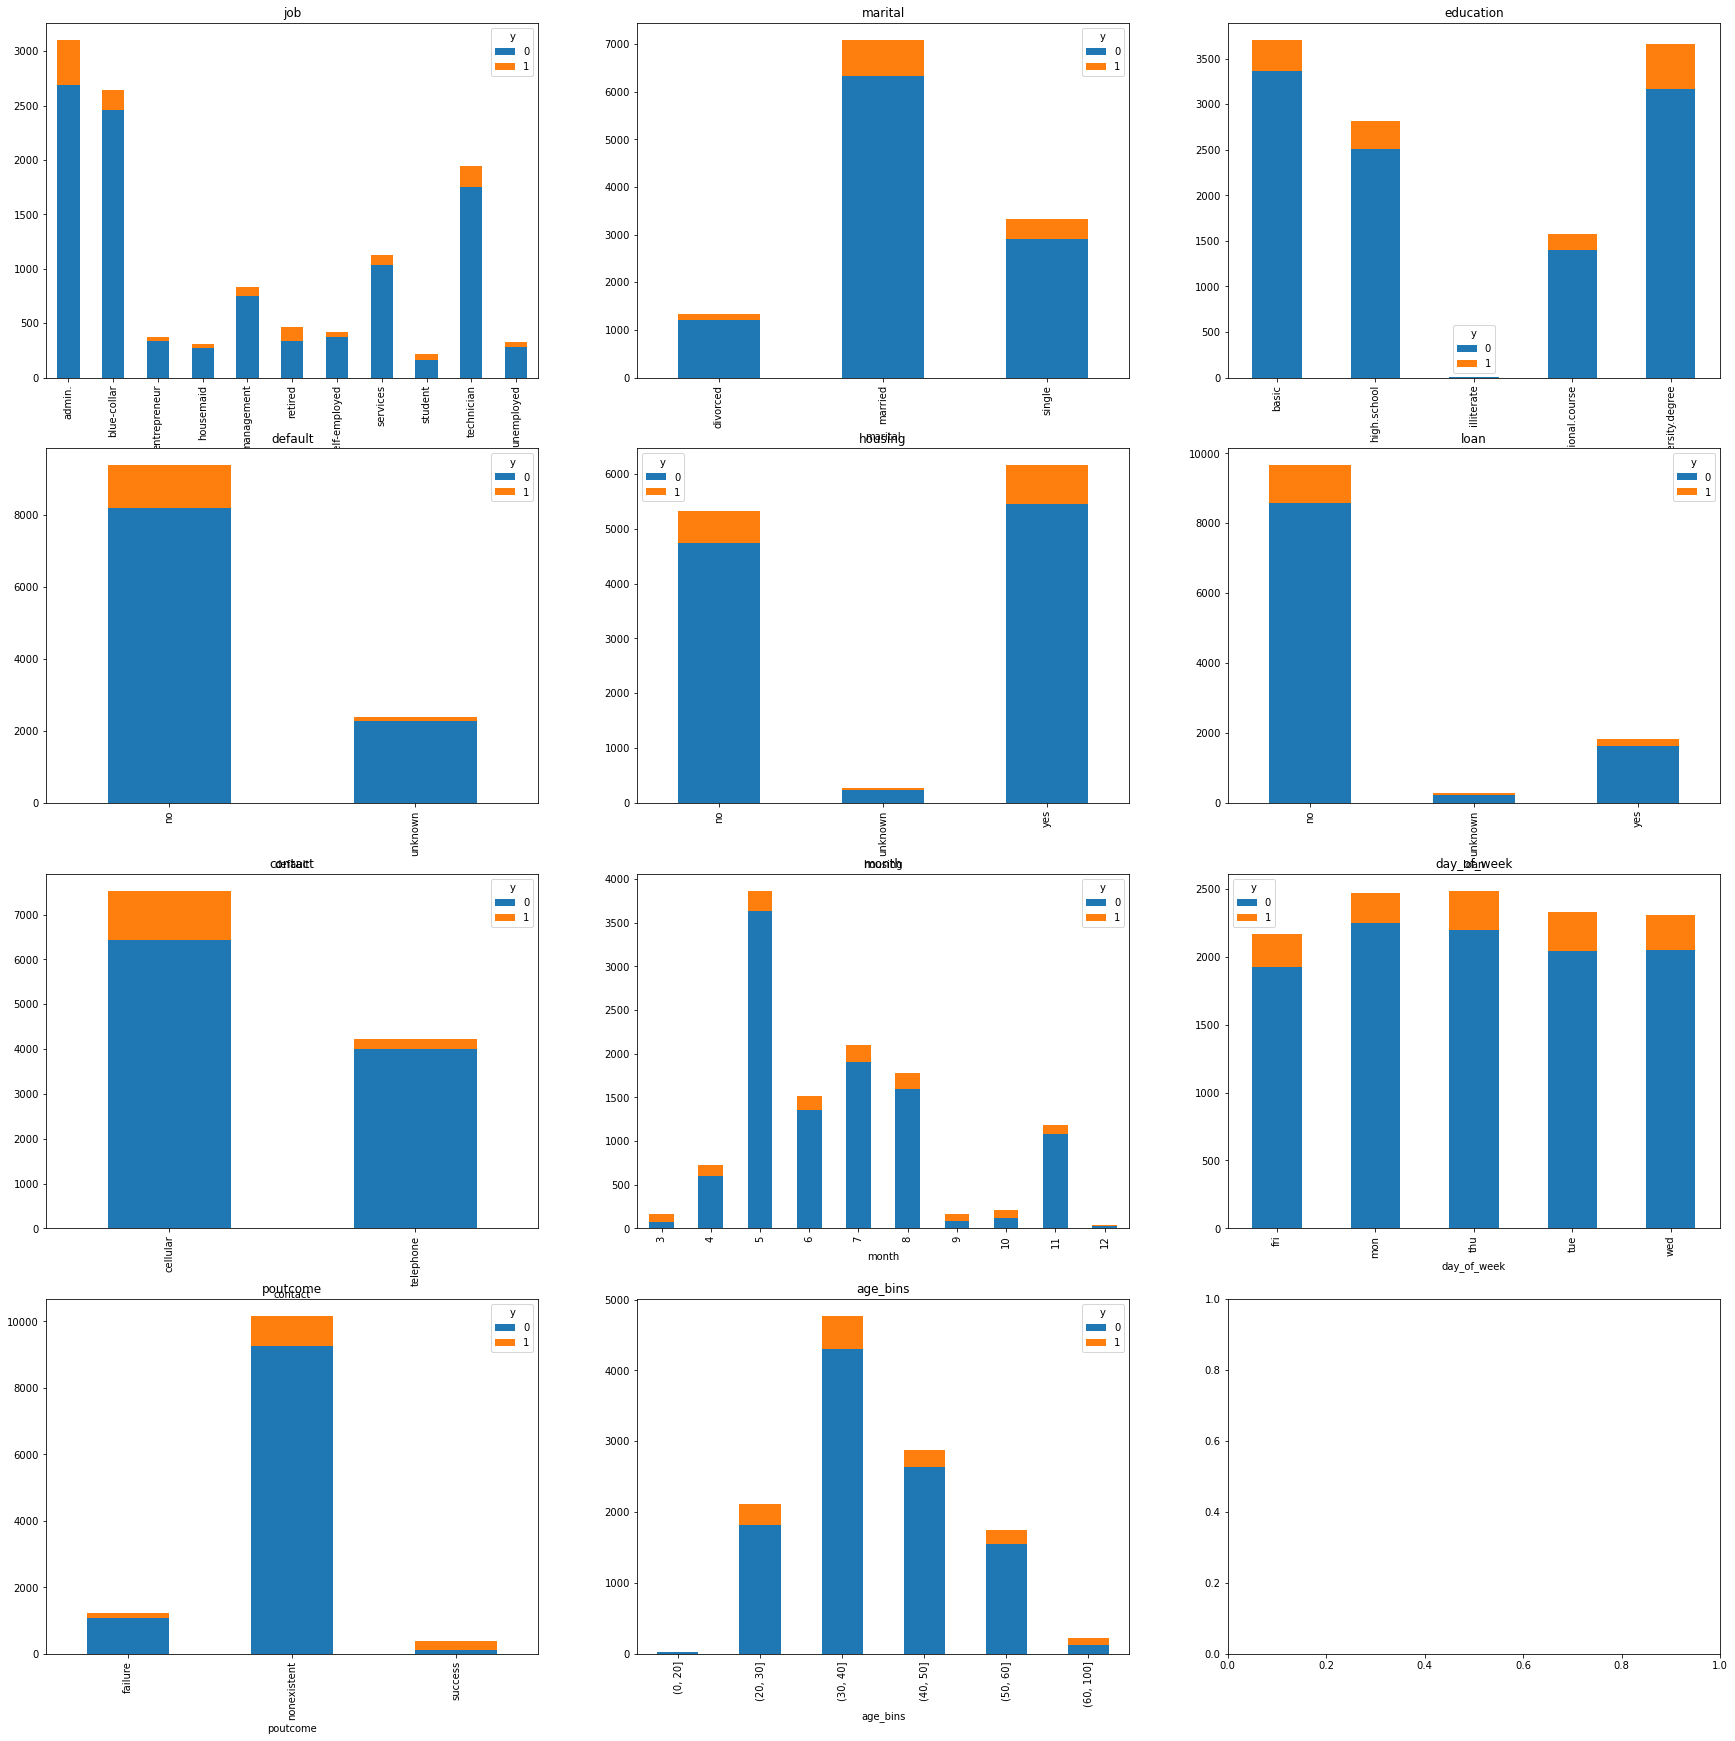

In [68]:
#Visualize Category graph for validation dataset
#Plot Scatter
nrow =4
ncol =3
i = 0
fig, axes = plt.subplots (nrow,ncol,figsize=(30,30))
for row in range(nrow):
    for col in range(ncol):
        if i < len(cat_col):
            #https://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots
            pd.crosstab(test[cat_col[i]], test['y']).plot(kind='bar', stacked=True,title = cat_col[i],ax=axes[row,col])
            i+=1

In [69]:
# Check ratio of validation positive class for
# Education = 'illiterate'
illiterate_ratio = sum(test[test['education'] == 'illiterate'].y)/len(test[test['education'] == 'illiterate'])
print('illiterate_ratio of test dataset',illiterate_ratio)

illiterate_ratio of test dataset 0.5


In [70]:
print('Train Ratio',sum(y_train)/len(y_train))
print('Validation Ratio',sum(y_val)/len(y_val))
print('Test Ratio',sum(y_test)/len(y_test))


Train Ratio 0.11124420603093589
Validation Ratio 0.11130012150668286
Test Ratio 0.11125287063026282


In [71]:
#Export training set 
train.to_excel(output_path + '/'+ "tele_train.xlsx")
validation.to_excel(output_path + '/'+ "tele_validation.xlsx")
test.to_excel(output_path + '/'+ "tele_test.xlsx")

## Data Sampling

<b>Oversampling

In [45]:
# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
from collections import Counter

In [46]:
oversample = RandomOverSampler(sampling_strategy =1,random_state = 0)

In [72]:
X_Train_RandomOver, Y_Train_RandomOver = oversample.fit_resample(X_train,y_train)

In [73]:
# Create Oversampling train dataset
train_over = X_Train_RandomOver
y_train_over_df = pd.DataFrame({'y':Y_Train_RandomOver})
train_over = pd.concat([train_over,y_train_over_df], axis= 1)

In [ ]:
train_over.to_excel(output_path + '/'+ "tele_train_OverSampling.xlsx")

In [74]:
print('Train Ratio for undersampling',sum(Y_Train_RandomOver)/len(Y_Train_RandomOver))

Train Ratio for undersampling 0.5


<b> Random Undersampling

In [75]:
undersample = RandomUnderSampler(sampling_strategy=1,random_state=0)

In [76]:
X_Train_RandomUnder, Y_Train_RandomUnder = undersample.fit_resample(X_train,y_train)

In [77]:
# Create Undersamping train dataset
train_under = X_Train_RandomUnder
y_train_under_df = pd.DataFrame({'y':Y_Train_RandomUnder})
train_under = pd.concat([train_under,y_train_under_df], axis= 1)

In [ ]:
train_under.to_excel(output_path + '/'+ "tele_train_UnderSampling.xlsx")

In [78]:
print('Train Ratio for undersampling',sum(Y_Train_RandomUnder)/len(Y_Train_RandomUnder))

Train Ratio for undersampling 0.5


# END

The below code was an trial code to try to create an oversampling dataset by SMOTE

<b>One hot coding data to oversampling and undersampling

In [ ]:
# https://github.com/feraguilari/dsc-mod-5-project-online-ds-pt-021119/blob/master/student.ipynb

In [ ]:
cat_col = ['job','marital','education','default','housing','loan','contact','month',
           'day_of_week','poutcome','age_bins']

num_col = ['campaign','pdays','previous','cons.price.idx','cons.conf.idx','euribor3m']

In [ ]:
train_cat = train[cat_col].astype('category')
train_num = train[num_col]
train_y = train['y']

In [ ]:
train_cat = pd.get_dummies(train_cat,columns = cat_col)

In [ ]:
cat_col_pos = range(len(train_cat.columns))

In [ ]:
train_col_name = train_cat.columns.tolist()

In [ ]:
# Create test dataset
train_data = pd.concat([train_cat,train_num], axis= 1)

<b> SMOTENC

In [ ]:
sm = SMOTENC(categorical_features=cat_col_pos, random_state=1, sampling_strategy=1)

In [ ]:
x_train_smote, y_train_smote = sm.fit_resample(train_data,train_y)

In [ ]:
print('Smote Ratio',sum(y_train_smote)/len(y_train_smote))

In [ ]:
# Transform data to its original from
x_smote_cat = x_train_smote[train_cat.columns.tolist()]
x_smote_num =  x_train_smote[num_col]

In [ ]:
job = train_col_name[0:11]
marital = train_col_name[11:14]
education =  train_col_name[14:19]
default =  train_col_name[19:21]
housing = train_col_name[21:24]
loan = train_col_name[24:27]
contact = train_col_name[27:29]
month = train_col_name[29:39]
day_of_week = train_col_name[39:44]
poutcome = train_col_name[44:47]
age_bins = train_col_name[47:53]

sub_col =[job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bins]

In [ ]:
#Create new df
smote_trn = pd.DataFrame(columns = cat_col)

# Concat column to original structure
#https://stackoverflow.com/questions/26762100/reconstruct-a-categorical-variable-from-dummies-in-pandas
for i in range(len(sub_col)):
    temp = x_smote_cat[sub_col[i]]
    temp = temp.idxmax(axis=1)
    smote_trn[cat_col[i]] = temp

# Extract to original data
#https://stackoverflow.com/questions/49660209/extract-last-term-after-comma-into-new-column
for i in cat_col:
    smote_trn[i] = smote_trn[i].str.rsplit('_').str[-1] 

In [ ]:
train_smote = pd.concat([smote_trn,x_smote_num,y_train_smote], axis= 1)

In [ ]:
sum(train_smote[train_smote['loan'] =='unknown'].y)

In [ ]:
train_smote.to_excel(output_path + '/'+ "tele_train_smote.xlsx")